# **Importing Libraries**

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn for machine learning models and preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss

# TensorFlow/Keras for deep learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# For custom base classifier (if needed)
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# **Fetching Dataset**

### About the Dataset:

The "bank-loan" dataset is focused on credit scoring, crucial for financial decision-making in loan approvals. It includes data on 700 bank customers who received loans and details their repayment outcomes, with a binary "Default" status indicating repayment success (0 for good, 1 for default). The dataset aims to support the development of a predictive credit scoring model that assists banks in assessing loan risks. Key features include:

- **Age**: Customer age in years.
- **Ed**: Education level (1 = No high school, 2 = High school, 3 = Some college, 4 = College degree, 5 = Postgrad).
- **Employ**: Years with the current employer.
- **Address**: Years at current address.
- **Income**: Household income in thousands.
- **Debtinc**: Debt-to-income ratio (x100).
- **Creddebt**: Credit card debt in thousands.
- **Othdebt**: Other debt in thousands.
- **Default**: Target variable, where 1 denotes default status and 0 denotes a good repayment history.

This dataset will be used to build a model to help banks optimize risk management and lending decisions.

In [ ]:
# Load the dataset
df = pd.read_csv('Bankloan.csv')

# **Displaying Dataset**

In [3]:
# Display the first few rows to understand the structure of the data before preprocessing 
print("Initial Data:")
print(df.head())

Initial Data:
    age  employ  address  income  debtinc   creddebt   othdebt   ed  default
0  41.0      17       12   176.0      9.3  11.359392  5.008608  3.0        1
1  27.0      10        6    31.0     17.3   1.362202  4.000798  1.0        0
2  40.0      15        7     NaN      5.5   0.856075  2.168925  1.0        0
3  41.0      15       14   120.0      2.9   2.658720  0.821280  NaN        0
4  24.0       2        0    28.0     17.3   1.787436  3.056564  2.0        1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       680 non-null    float64
 1   employ    700 non-null    int64  
 2   address   700 non-null    int64  
 3   income    663 non-null    float64
 4   debtinc   700 non-null    float64
 5   creddebt  700 non-null    float64
 6   othdebt   700 non-null    float64
 7   ed        680 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 49.3 KB


In [5]:
df.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
count,680.000000,700.000000,700.000000,663.00000,700.000000,700.000000,700.000000,680.000000,700.000000
mean,34.750000,8.388571,8.268571,45.74359,10.260571,1.553553,3.058209,1.717647,0.261429
std,7.973215,6.658039,6.821609,37.44108,6.827234,2.117197,3.287555,0.925652,0.439727
min,20.000000,0.000000,0.000000,14.00000,0.400000,0.011696,0.045584,1.000000,0.000000
25%,28.000000,3.000000,3.000000,24.00000,5.000000,0.369059,1.044178,1.000000,0.000000
50%,34.000000,7.000000,7.000000,34.00000,8.600000,0.854869,1.987567,1.000000,0.000000
75%,40.000000,12.000000,12.000000,54.50000,14.125000,1.901955,3.923065,2.000000,1.000000
max,56.000000,31.000000,34.000000,446.00000,41.300000,20.561310,27.033600,5.000000,1.000000


In [6]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
age         20
employ       0
address      0
income      37
debtinc      0
creddebt     0
othdebt      0
ed          20
default      0
dtype: int64


# **Preprocessing**

### Handling Missing Values

To ensure the dataset is complete and ready for analysis, we'll address any missing values by following these steps:

1. **Numerical Columns**: Missing values in numerical columns will be filled with the median. This approach helps to mitigate the influence of outliers on imputed values.
2. **Categorical Columns**: Missing values in categorical columns will be filled with the mode (most frequent value), maintaining the most common category for better consistency.

In [7]:
# Handle missing values:
# 1. For numerical columns, we'll fill missing values with the median
# 2. For categorical columns, we'll fill missing values with the mode (most frequent value)

# Identifying numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Identifying categorical columns
# Explicitly defining categorical columns based on the data understanding
cat_cols = ['ed']  # 'ed' is categorical, as it is encoded from 1 to 5

# Check the columns identified as categorical
print("\nCategorical Columns:", cat_cols)

# Create an imputer for numerical columns to fill missing values with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Create an imputer for categorical columns to fill missing values with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


Categorical Columns: ['ed']


In [8]:
# Verify if any missing values remain
print("\nMissing Values After Imputation:")
print(df.isnull().sum())



Missing Values After Imputation:
age         0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
ed          0
default     0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   employ    700 non-null    float64
 2   address   700 non-null    float64
 3   income    700 non-null    float64
 4   debtinc   700 non-null    float64
 5   creddebt  700 non-null    float64
 6   othdebt   700 non-null    float64
 7   ed        700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 49.3 KB


## Encoding Categorical Variables

To prepare categorical variables for modeling, we need to encode them into a numerical format:

- The **'Ed'** column, representing education levels, is a categorical variable with values ranging from 1 to 5. We'll use `LabelEncoder` to convert these categories into numerical form.

/var/folders/xx/d4y5bsbx2210fv9gdbdqc8s80000gn/T/ipykernel_11227/721629432.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='coolwarm')


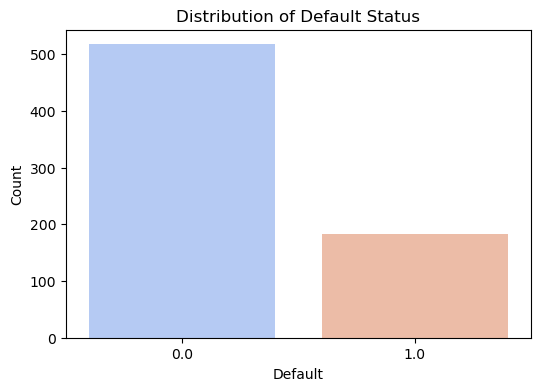

In [10]:
# Encode the categorical variables if necessary
# 'Ed' is a categorical feature, so we can use LabelEncoder to convert it into numerical form
label_encoder = LabelEncoder()
df['ed'] = label_encoder.fit_transform(df['ed'])

# Display the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df, palette='coolwarm')
plt.title('Distribution of Default Status')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

## Visualizing the Correlation Matrix

To understand the relationships between variables in the dataset, we will plot a correlation heatmap. This visualization will help identify the strength and direction of correlations between numerical features, which can be useful for feature selection and understanding feature interactions.

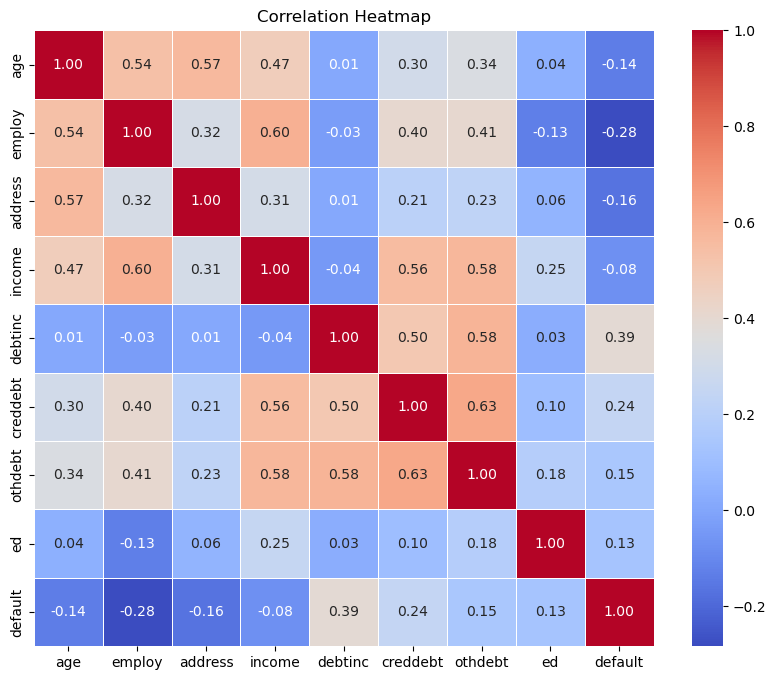

In [11]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Visualizing Pairwise Relationships

To further explore the relationships between features and understand patterns in the data, we will create a pairplot. This plot displays pairwise relationships between numerical features, color-coded by the target variable **'Default'**. It helps in identifying potential clusters, separations, and distributions that could be relevant for predictive modeling.

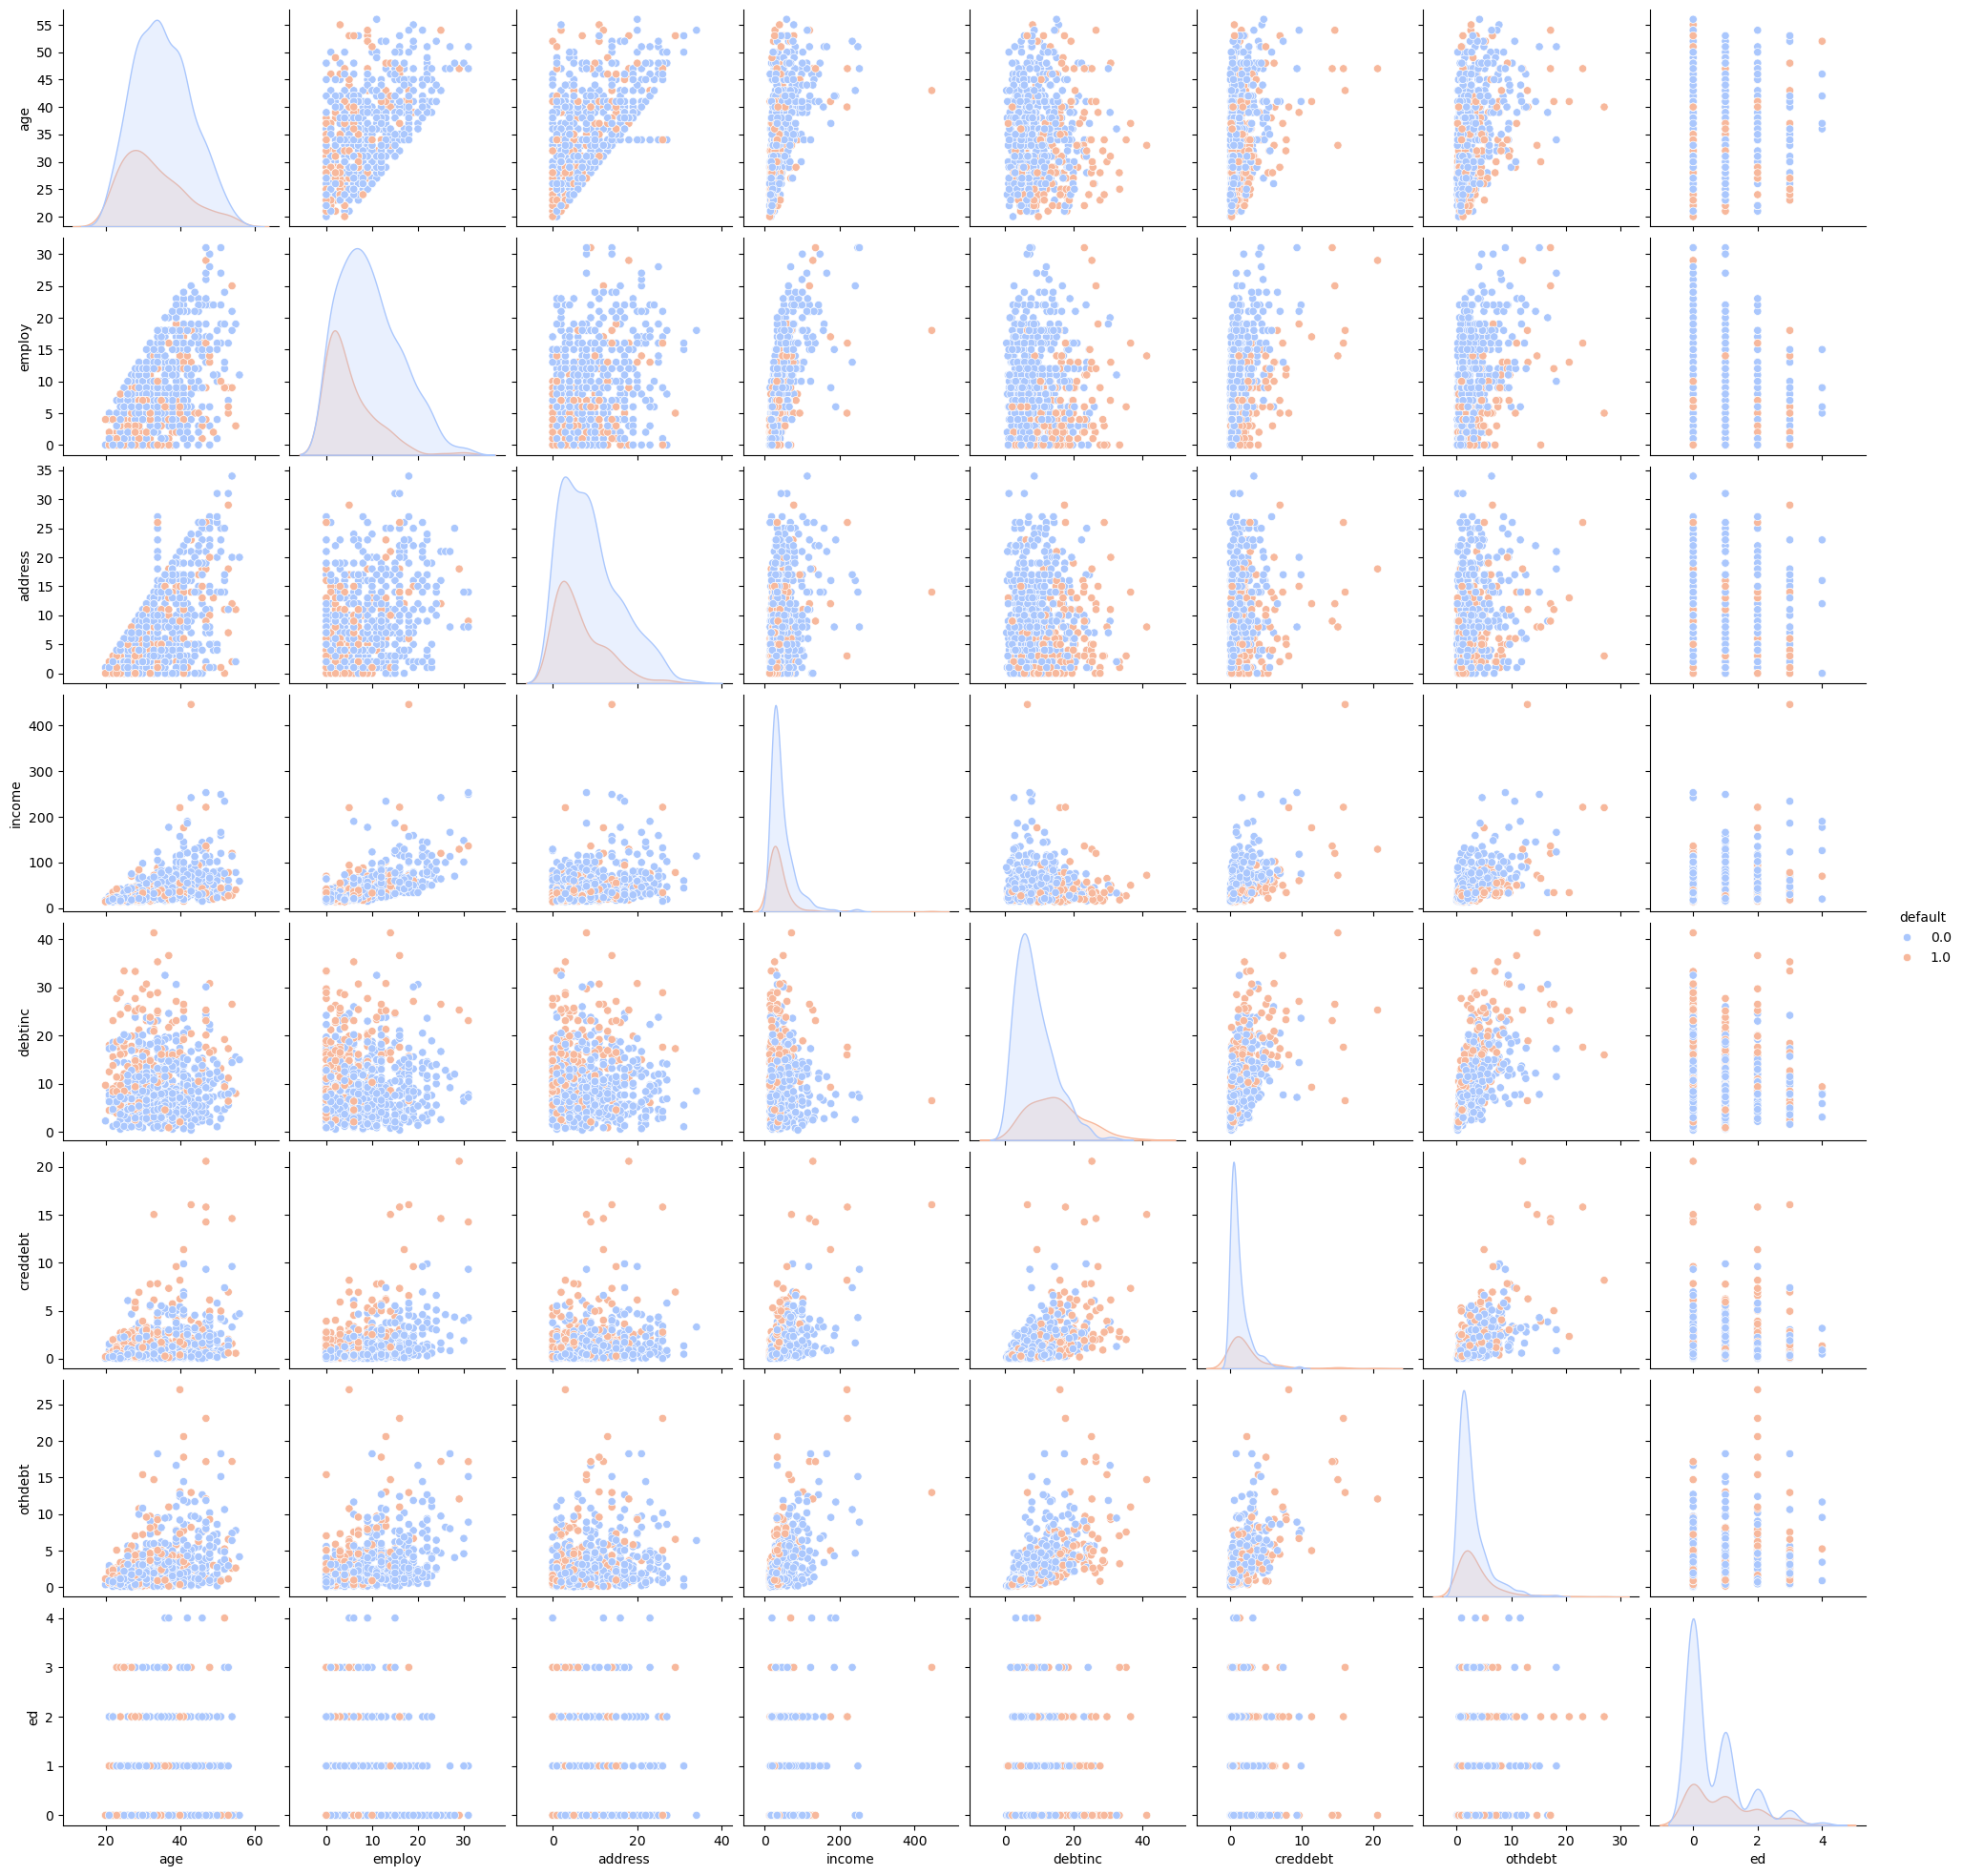

In [12]:
# Visualize pairwise relationships for the features
sns.pairplot(df, hue='default', diag_kind='kde', palette='coolwarm')
plt.show()

## Data Splitting and Preprocessing

To prepare the dataset for modeling, we perform the following steps:

1. **Splitting Features and Target**: The dataset is divided into features (X) and the target variable (y), where 'default' serves as the target.

2. **Training and Testing Sets**: We split the data into training and testing sets, with 70% of the data for training and 30% for testing, ensuring an unbiased model evaluation.

3. **Standardization**: The features are standardized using `StandardScaler` to transform them into a common scale. This step helps in improving model performance and convergence, especially for algorithms sensitive to feature scaling.

4. **Summary of Preprocessing**: After scaling, the data is ready for modeling, ensuring a consistent and optimized input for machine learning algorithms.

Now that preprocessing is complete, we can proceed to model development.


In [13]:

# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['default'])
y = df['default']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled data
print("\nScaled Data (First 5 rows of X_train_scaled):")
print(X_train_scaled[:5])

# Now, the data is preprocessed, and we can move on to model development
# For now, we'll just show the summary of the preprocessing
print("\nPreprocessing Complete. Data is ready for modeling.")



Scaled Data (First 5 rows of X_train_scaled):
[[-1.32755167 -1.2442356  -0.92295568 -0.80935606  0.84829132 -0.60284836
  -0.28727213  0.2724169 ]
 [-0.70231107 -0.49043312 -0.19773393 -0.46656363  1.22900191  0.27873052
   0.02017597  0.2724169 ]
 [-0.20211859  0.11260886 -0.05268958 -0.36108904 -0.70383646 -0.51729771
  -0.5383796  -0.77042903]
 [ 1.42350696 -1.09347511  0.96262086 -0.65114417  0.65793603 -0.08715123
  -0.39697112 -0.77042903]
 [-0.82735919 -0.18891213 -0.92295568 -0.30835174 -0.48419573 -0.58419453
  -0.30941012  0.2724169 ]]

Preprocessing Complete. Data is ready for modeling.


Splitting the dataset - train and test

In [14]:
# Load and preprocess your dataset
X_features = df.drop('default', axis=1)  # Features (predictors)
y_target = df['default']  # Target variable (default)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)
y_train = y_train.to_numpy()


# *Models Considered for Comparison :*
1) Random Forest

2) SVM

3) Decision tree

4) LSTM

# **Random Forest Classifier**

## Model Definition and Hyperparameter Tuning

In [15]:
# Define the model and parameter grid for hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


## KFold Cross-Validation

In [16]:
# KFold Cross-validation setup
cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare to store results in a DataFrame
metrics_per_fold = []

# Perform 10-Fold Cross-validation
for fold_number, (train_idx, val_idx) in enumerate(cv_strategy.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Fit model on the fold
    best_rf_model.fit(X_train_fold, y_train_fold)
    y_pred = best_rf_model.predict(X_val_fold)
    y_proba = best_rf_model.predict_proba(X_val_fold)[:, 1]

    # Initialize counts
    tp = tn = fp = fn = 0

    # Calculate manually
    for true, pred in zip(y_val_fold, y_pred):
        if true == 1 and pred == 1:
            tp += 1  # True Positive
        elif true == 0 and pred == 0:
            tn += 1  # True Negative
        elif true == 0 and pred == 1:
            fp += 1  # False Positive
        elif true == 1 and pred == 0:
            fn += 1  # False Negative
    
    # Calculate metrics
    true_positive_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    true_negative_rate = tn / (tn + fp) if (tn + fp) > 0 else 0
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1_score = 2 * precision * true_positive_rate / (precision + true_positive_rate) if (precision + true_positive_rate) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    error_rate = 1 - accuracy
    balanced_accuracy = (true_positive_rate + true_negative_rate) / 2
    true_skill_statistic = true_positive_rate + true_negative_rate - 1
    heidke_skill_score = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    brier_score = brier_score_loss(y_val_fold, y_proba)
    auc_score = roc_auc_score(y_val_fold, y_proba)
    
    # Append metrics for each fold
    metrics_per_fold.append([fold_number, tp, tn, fp, fn, true_positive_rate, true_negative_rate, false_positive_rate,
                             false_negative_rate, precision, f1_score, accuracy, error_rate, balanced_accuracy, 
                             true_skill_statistic, heidke_skill_score, brier_score, auc_score])

# Create DataFrame with fold metrics
metrics_rf = pd.DataFrame(metrics_per_fold, columns=[
    'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
    'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS', 
    'Brier_score', 'AUC'
])

# Display results per fold and calculate average metrics across all folds
metrics_rf.loc['Average'] = metrics_rf.mean(numeric_only=True)
print(metrics_rf)

         Fold    TP    TN   FP    FN       TPR       TNR       FPR       FNR  \
0         1.0   3.0  32.0  2.0  19.0  0.136364  0.941176  0.058824  0.863636   
1         2.0   4.0  42.0  4.0   6.0  0.400000  0.913043  0.086957  0.600000   
2         3.0   4.0  41.0  4.0   7.0  0.363636  0.911111  0.088889  0.636364   
3         4.0  12.0  27.0  6.0  11.0  0.521739  0.818182  0.181818  0.478261   
4         5.0   6.0  37.0  7.0   6.0  0.500000  0.840909  0.159091  0.500000   
5         6.0   6.0  35.0  6.0   9.0  0.400000  0.853659  0.146341  0.600000   
6         7.0   8.0  38.0  4.0   6.0  0.571429  0.904762  0.095238  0.428571   
7         8.0   3.0  42.0  5.0   6.0  0.333333  0.893617  0.106383  0.666667   
8         9.0   9.0  38.0  1.0   8.0  0.529412  0.974359  0.025641  0.470588   
9        10.0   6.0  41.0  3.0   6.0  0.500000  0.931818  0.068182  0.500000   
Average   5.5   6.1  37.3  4.2   8.4  0.425591  0.898264  0.101736  0.574409   

         Precision  F1_measure  Accurac

## ROC Curve and AUC Score for Model Evaluation

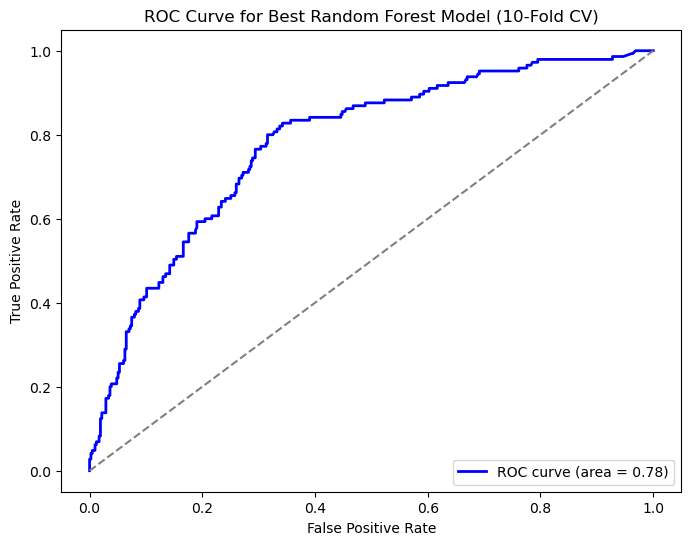

Average ROC AUC Score across folds: 0.78


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Aggregate true labels and predicted probabilities across all folds
y_true_all = []
y_proba_all = []

for train_idx, val_idx in cv_strategy.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Fit the model and predict probabilities
    best_rf_model.fit(X_train_fold, y_train_fold)
    y_proba = best_rf_model.predict_proba(X_val_fold)[:, 1]
    
    # Append the results to the lists
    y_true_all.extend(y_val_fold)
    y_proba_all.extend(y_proba)

# Convert lists to numpy arrays for further calculations
y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_proba_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model (10-Fold CV)')
plt.legend(loc='lower right')
plt.show()

print(f"Average ROC AUC Score across folds: {roc_auc:.2f}")


# **SVM**
### Hyperparameter Tuning

In [18]:
# Define the model and parameter grid for hyperparameter tuning
svm = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


### Model Creation, Kfold cross validation and Calculate metrics

In [19]:
# KFold Cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare to store results in a DataFrame
metrics_list = []

# Perform 10-Fold Cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Fit model on the fold
    best_svm.fit(X_train_fold, y_train_fold)
    y_pred = best_svm.predict(X_val_fold)
    y_proba = best_svm.predict_proba(X_val_fold)[:, 1]

    # Initialize counts
    tp = tn = fp = fn = 0

    # Calculate manually
    for true, pred in zip(y_val_fold, y_pred):
        if true == 1 and pred == 1:
            tp += 1  # True Positive
        elif true == 0 and pred == 0:
            tn += 1  # True Negative
        elif true == 0 and pred == 1:
            fp += 1  # False Positive
        elif true == 1 and pred == 0:
            fn += 1  # False Negative
    
    # Calculate metrics
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
    FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
    Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    F1 = 2 * Precision * TPR / (Precision + TPR) if (Precision + TPR) > 0 else 0
    Accuracy = (tp + tn) / (tp + tn + fp + fn)
    Error_rate = 1 - Accuracy
    BACC = (TPR + TNR) / 2
    TSS = TPR + TNR - 1
    HSS = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    Brier_score = brier_score_loss(y_val_fold, y_proba)
    AUC = roc_auc_score(y_val_fold, y_proba)
    
    # Append metrics for each fold
    metrics_list.append([fold, tp, tn, fp, fn, TPR, TNR, FPR, FNR, Precision, F1, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Create DataFrame with fold metrics
metrics_svm = pd.DataFrame(metrics_list, columns=[
    'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
    'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC',
    'TSS', 'HSS', 'Brier_score', 'AUC'
])

# Display results per fold and calculate average metrics across all folds
metrics_svm.loc['Average'] = metrics_svm.mean(numeric_only=True)
print(metrics_svm)


         Fold   TP    TN   FP    FN       TPR       TNR       FPR       FNR  \
0         1.0  2.0  31.0  3.0  20.0  0.090909  0.911765  0.088235  0.909091   
1         2.0  5.0  45.0  1.0   5.0  0.500000  0.978261  0.021739  0.500000   
2         3.0  5.0  43.0  2.0   6.0  0.454545  0.955556  0.044444  0.545455   
3         4.0  9.0  30.0  3.0  14.0  0.391304  0.909091  0.090909  0.608696   
4         5.0  4.0  39.0  5.0   8.0  0.333333  0.886364  0.113636  0.666667   
5         6.0  5.0  37.0  4.0  10.0  0.333333  0.902439  0.097561  0.666667   
6         7.0  3.0  40.0  2.0  11.0  0.214286  0.952381  0.047619  0.785714   
7         8.0  3.0  43.0  4.0   6.0  0.333333  0.914894  0.085106  0.666667   
8         9.0  6.0  39.0  0.0  11.0  0.352941  1.000000  0.000000  0.647059   
9        10.0  3.0  41.0  3.0   9.0  0.250000  0.931818  0.068182  0.750000   
Average   5.5  4.5  38.8  2.7  10.0  0.325399  0.934257  0.065743  0.674601   

         Precision  F1_measure  Accuracy  Error_rat

### ROC Curve

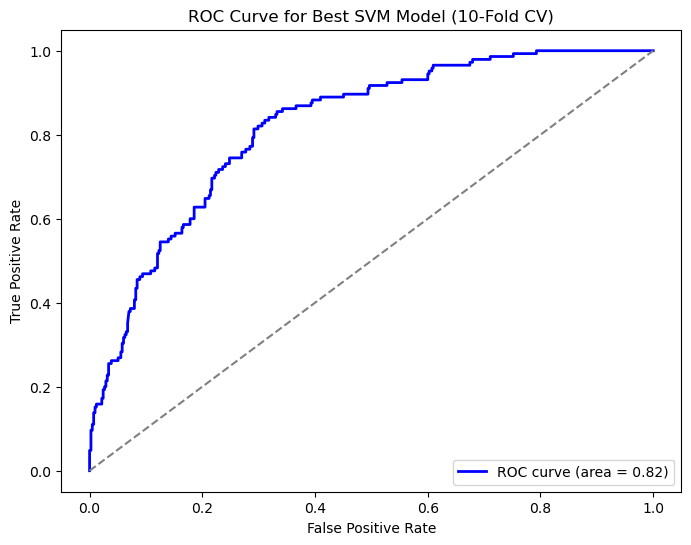

Average ROC AUC Score across folds: 0.82


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Aggregate true labels and predicted probabilities across all folds
y_true_all = []
y_proba_all = []

for train_idx, val_idx in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Fit the model and predict probabilities for each fold
    best_svm.fit(X_train_fold, y_train_fold)
    y_proba = best_svm.predict_proba(X_val_fold)[:, 1]
    
    # Append the results to the lists
    y_true_all.extend(y_val_fold)
    y_proba_all.extend(y_proba)

# Convert lists to numpy arrays for further calculations
y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_proba_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best SVM Model (10-Fold CV)')
plt.legend(loc='lower right')
plt.show()

print(f"Average ROC AUC Score across folds: {roc_auc:.2f}")

# Decision Tree
### Hyperparameter Tuning

In [21]:
# Define the model and parameter grid for hyperparameter tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Hyperparameter tuning
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
print(f"Best Decision Tree Model: {best_dt}")

Best Decision Tree Model: DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20,
                       random_state=42)


### Model Creation, Kfold cross validation and metrics

In [22]:
# KFold Cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare to store results in a DataFrame
metrics_list = []

# Perform 10-Fold Cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Fit model on the fold
    best_dt.fit(X_train_fold, y_train_fold)
    y_pred = best_dt.predict(X_val_fold)
    y_proba = best_dt.predict_proba(X_val_fold)[:, 1]

    # Initialize counts
    tp = tn = fp = fn = 0

    # Loop through true and predicted labels
    for true, pred in zip(y_val_fold, y_pred):
        if true == 1 and pred == 1:
            tp += 1  # True Positive
        elif true == 0 and pred == 0:
            tn += 1  # True Negative
        elif true == 0 and pred == 1:
            fp += 1  # False Positive
        elif true == 1 and pred == 0:
            fn += 1  # False Negative
    
    # Calculate metrics
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
    FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
    Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    F1 = 2 * Precision * TPR / (Precision + TPR) if (Precision + TPR) > 0 else 0
    Accuracy = (tp + tn) / (tp + tn + fp + fn)
    Error_rate = 1 - Accuracy
    BACC = (TPR + TNR) / 2
    TSS = TPR + TNR - 1
    HSS = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    Brier_score = brier_score_loss(y_val_fold, y_proba)
    AUC = roc_auc_score(y_val_fold, y_proba)
    
    # Append metrics for each fold
    metrics_list.append([fold, tp, tn, fp, fn, TPR, TNR, FPR, FNR, Precision, F1, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Create DataFrame with fold metrics
metrics_dt = pd.DataFrame(metrics_list, columns=[
    'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
    'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC',
    'TSS', 'HSS', 'Brier_score', 'AUC'
])

# Display results per fold and calculate average metrics across all folds
metrics_dt.loc['Average'] = metrics_dt.mean(numeric_only=True)
print(metrics_dt)


         Fold    TP    TN   FP    FN       TPR       TNR       FPR       FNR  \
0         1.0   5.0  32.0  2.0  17.0  0.227273  0.941176  0.058824  0.772727   
1         2.0   4.0  39.0  7.0   6.0  0.400000  0.847826  0.152174  0.600000   
2         3.0   6.0  39.0  6.0   5.0  0.545455  0.866667  0.133333  0.454545   
3         4.0   9.0  28.0  5.0  14.0  0.391304  0.848485  0.151515  0.608696   
4         5.0   4.0  37.0  7.0   8.0  0.333333  0.840909  0.159091  0.666667   
5         6.0   6.0  34.0  7.0   9.0  0.400000  0.829268  0.170732  0.600000   
6         7.0   8.0  35.0  7.0   6.0  0.571429  0.833333  0.166667  0.428571   
7         8.0   3.0  40.0  7.0   6.0  0.333333  0.851064  0.148936  0.666667   
8         9.0  10.0  32.0  7.0   7.0  0.588235  0.820513  0.179487  0.411765   
9        10.0   3.0  38.0  6.0   9.0  0.250000  0.863636  0.136364  0.750000   
Average   5.5   5.8  35.4  6.1   8.7  0.404036  0.854288  0.145712  0.595964   

         Precision  F1_measure  Accurac

### ROC Curve

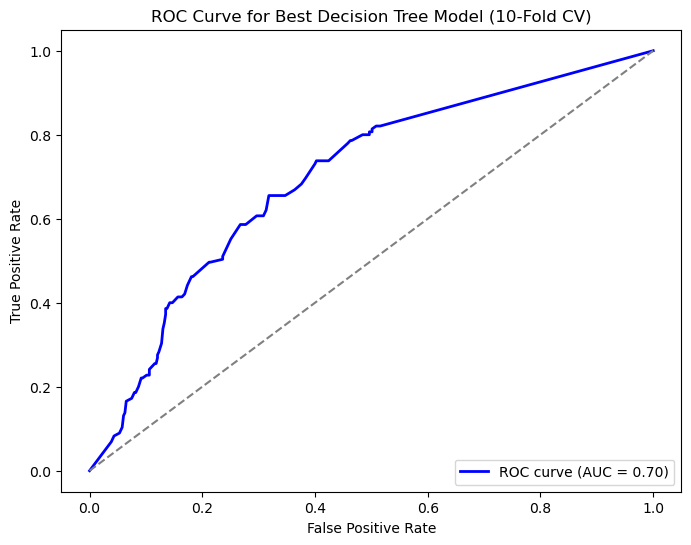

Average ROC AUC Score across folds: 0.70


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Aggregate true labels and predicted probabilities across all folds
y_true_all = []
y_proba_all = []

# Perform 10-Fold Cross-validation with the best Decision Tree model
for train_idx, val_idx in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Fit the model on the training fold
    best_dt.fit(X_train_fold, y_train_fold)
    y_proba = best_dt.predict_proba(X_val_fold)[:, 1]  # Get probability for positive class
    
    # Store the true labels and predicted probabilities for the validation fold
    y_true_all.extend(y_val_fold)
    y_proba_all.extend(y_proba)

# Convert lists to numpy arrays for calculations
y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_proba_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Decision Tree Model (10-Fold CV)')
plt.legend(loc='lower right')
plt.show()

print(f"Average ROC AUC Score across folds: {roc_auc:.2f}")


# LSTM

### Model Creation, Hyperparameter tuning, kfold cross validation and metrics

In [24]:
# Separate features and target
X = df.drop('default', axis=1).values
y = df['default'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define custom Keras model wrapper
class KerasLSTMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.001, dropout_rate=0.2, epochs=20, batch_size=32):
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
    
    def fit(self, X, y):
        self.model = self.create_lstm_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
    
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32").flatten()
    
    def create_lstm_model(self):
        model = Sequential()
        model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

# Create the KerasLSTMClassifier
model = KerasLSTMClassifier()

# Define hyperparameters grid to tune
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.2, 0.3],
}

# Set up GridSearchCV with 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_result = grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_result.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best model with the best hyperparameters
best_model = grid_result.best_estimator_

# Evaluate the best model with 10-fold cross-validation
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    # Train the model
    best_model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred = best_model.predict(X_val_fold)
    y_proba = best_model.model.predict(X_val_fold).flatten()
    
    # Initialize counts
    tp = tn = fp = fn = 0

    # Manually compute confusion matrix components
    for true, pred in zip(y_val_fold, y_pred):
        if true == 1 and pred == 1:
            tp += 1  # True Positive
        elif true == 0 and pred == 0:
            tn += 1  # True Negative
        elif true == 0 and pred == 1:
            fp += 1  # False Positive
        elif true == 1 and pred == 0:
            fn += 1  # False Negative
    
    # Calculate metrics
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
    FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
    Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    F1 = 2 * Precision * TPR / (Precision + TPR) if (Precision + TPR) > 0 else 0
    Accuracy = (tp + tn) / (tp + tn + fp + fn)
    Error_rate = 1 - Accuracy
    BACC = (TPR + TNR) / 2
    TSS = TPR + TNR - 1
    HSS = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    Brier_score = brier_score_loss(y_val_fold, y_proba)
    AUC = roc_auc_score(y_val_fold, y_proba)
    
    # Append metrics for each fold
    metrics_list.append([fold, tp, tn, fp, fn, TPR, TNR, FPR, FNR, Precision, F1, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Create DataFrame with fold metrics
metrics_lstm = pd.DataFrame(metrics_list, columns=[
    'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
    'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC',
    'TSS', 'HSS', 'Brier_score', 'AUC'
])

# Display results for only the best hyperparameters
metrics_lstm.loc['Average'] = metrics_lstm.mean(numeric_only=True)
print(metrics_lstm)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/r

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/stepp
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pas

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/stepp
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/stepp


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/r

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/stepp


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/stepp


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best Hyperparameters: {'dropout_rate': 0.3, 'learning_rate': 0.01}
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x310140220> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30b4f3c40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
         Fold    TP    TN   FP    FN       TPR       TNR       FPR       FNR  \
0         1.0  12.0  48.0  4.0   6.0  0.666667  0.923077  0.076923  0.333333   
1         2.0  10.0  49.0  1.0  10.0  0.500000  0.980000  0.020000  0.500000   
2         3.0   6.0  54.0  5.0   5.0  0.545455  0.915254  0.084746  0.454545   
3         4.0   8.0  42.0  5.0  15.0  0.347826  0.893617  0.106383  0.652174   
4         5.0   8.0  43.0  6.0  13.0  0.380952  0.877551  0.122449  0.619048   
5         6.0   7.0  49.0  3.0  11.0  0.388889  0.942308  0.057692  0.611111   
6         7.0   9.0  50.0  4.0   7.0  0.562500  0.925926  0.074074  0.437500   
7         8.0   7.0  48.0  4.0  11.0  0.388889  0.923077  0.076923  0.611111   
8         9.0   9.0  51.0  2.0   8.0  0.529412  0.962264  0.037736  0.470588   
9        10.0   6.0  44.0  5.0  15.0  0.285714  0.897959  0.102041  0.714286   
Average   5.5   8.2  47.8  3.9  10.1  0.459

### ROC Curve

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


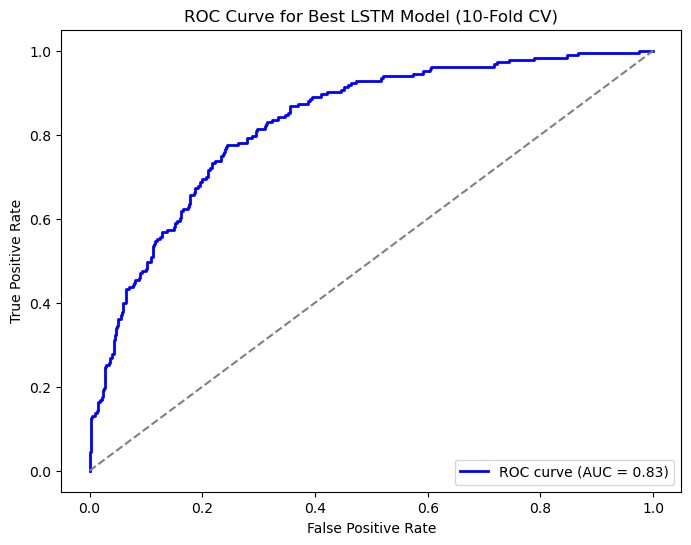

Average ROC AUC Score across folds: 0.83


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Aggregating true labels and predicted probabilities across all folds
y_true_all = []
y_proba_all = []

# Perform 10-Fold Cross-validation with the best LSTM model
for train_idx, val_idx in cv.split(X, y):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    # Fit the best model on the training fold
    best_model.fit(X_train_fold, y_train_fold)
    
    # Get the predicted probabilities for the validation fold
    y_proba = best_model.model.predict(X_val_fold).flatten()
    
    # Store the true labels and predicted probabilities
    y_true_all.extend(y_val_fold)
    y_proba_all.extend(y_proba)

# Convert lists to numpy arrays for calculations
y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_proba_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best LSTM Model (10-Fold CV)')
plt.legend(loc='lower right')
plt.show()

print(f"Average ROC AUC Score across folds: {roc_auc:.2f}")


# Result

In [26]:
# Add a new column to each DataFrame for the model name
metrics_rf['Model'] = 'Random Forest'
metrics_svm['Model'] = 'SVM'
metrics_dt['Model'] = 'Decision Tree'
metrics_lstm['Model'] = 'LSTM'

# Select the last row from each DataFrame and merge them vertically
merged_metrics = pd.concat([metrics_rf[-1:], metrics_svm[-1:], metrics_dt[-1:], metrics_lstm[-1:]], ignore_index=True)

# Move the 'Model' column to the first position
merged_metrics = merged_metrics[['Model'] + [col for col in merged_metrics.columns if col != 'Model']]

# Transpose the DataFrame to have models as column names
merged_metrics = merged_metrics.set_index('Model').T

# Display the DataFrame with bold model names in the first row
# Formatting the model names as bold for display (works in Jupyter environments)
merged_metrics.columns = [f"{col}" for col in merged_metrics.columns]

# Display the transposed DataFrame
merged_metrics


,Random Forest,SVM,Decision Tree,LSTM
Fold,5.500000,5.500000,5.500000,5.500000
TP,6.100000,4.500000,5.800000,8.200000
TN,37.300000,38.800000,35.400000,47.800000
FP,4.200000,2.700000,6.100000,3.900000
FN,8.400000,10.000000,8.700000,10.100000
TPR,0.425591,0.325399,0.404036,0.459630
TNR,0.898264,0.934257,0.854288,0.924103
FPR,0.101736,0.065743,0.145712,0.075897
FNR,0.574409,0.674601,0.595964,0.540370
Precision,0.583654,0.622619,0.480086,0.678367


## Model Comparison and Ranking

In this step, the performance of different models is compared using key evaluation metrics, and the best model is determined based on a ranking system.

### Key Metrics Selected for Comparison:
- **Accuracy**
- **AUC (Area Under the Curve)**
- **Precision**
- **F1-Score**
- **Balanced Accuracy (BACC)**
- **Heidke Skill Score (HSS)**

### Process:
1. **Metric Selection**: The relevant metrics were selected for comparison.
2. **Ranking**: Models were ranked based on each of the key metrics, with higher values indicating better performance (e.g., higher accuracy and AUC are favorable).
3. **Total Score Calculation**: The ranks for each model across all key metrics were summed. A lower total score indicates better overall performance.
4. **Best Model Identification**: The model with the lowest total score was identified as the best model.

### Outcome:
- **Ranking Results**: The ranking of models across all metrics is provided.
- **Best Model**: The model with the lowest total score is determined to be the best performer overall.


In [27]:
# Assuming merged_metrics is the transposed DataFrame with model metrics
# Select key metrics for comparison
key_metrics = ['Accuracy', 'AUC', 'Precision', 'F1_measure', 'BACC', 'HSS']

# Filter the merged metrics DataFrame to only key metrics
metrics_for_ranking = merged_metrics.loc[key_metrics]

# Rank each model for each metric (higher is better, so we rank by descending values)
ranks = metrics_for_ranking.rank(ascending=False, axis=1)

# Sum ranks for each model to get a total score (lower score indicates better performance)
total_scores = ranks.sum()

# Find the model with the lowest total score
best_model = total_scores.idxmin()

# Display the ranking results and the best model
print("Ranking of Models by Metrics:\n", ranks)
print("\nTotal Scores for Each Model:\n", total_scores)
print(f"\nBest Model Overall: {best_model}")

Ranking of Models by Metrics:
             Random Forest  SVM  Decision Tree  LSTM
Accuracy              2.0  3.0            4.0   1.0
AUC                   3.0  2.0            4.0   1.0
Precision             3.0  2.0            4.0   1.0
F1_measure            2.0  4.0            3.0   1.0
BACC                  2.0  3.0            4.0   1.0
HSS                   2.0  3.0            4.0   1.0

Total Scores for Each Model:
 Random Forest    14.0
SVM              17.0
Decision Tree    23.0
LSTM              6.0
dtype: float64

Best Model Overall: LSTM
